In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import pandas as pd
import shutil
import time
import cv2 as cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML
# stop annoying tensorflow warning messages
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import math
from tensorflow.keras.utils import to_categorical, plot_model
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt; plt.rcdefaults()


from sklearn import datasets, preprocessing, linear_model
from sklearn.model_selection import train_test_split 

from skimage import io, transform, color, exposure, img_as_float
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.metrics import classification_report


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model



import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense


from sklearn.impute import SimpleImputer

#Helper Functions


In [ ]:

def calculations(cm_test,classes):



  cal_d_test = {}
  for i in range(len(classes)):
    cal_d_test[classes[i]] = []
    TP = cm_test[i][i]
    FN = 0
    FP = 0
    TN = 0

    for j in cm_test[i]:
      FN+=j
    FN = FN - TP
  
    for j in range(len(classes)):
      FP += cm_test[j][i]
    FP = FP - TP

    for x in range(len(classes)):
      for y in range(len(classes)):
        TN += cm_test[x][y]
    TN = TN - TP - FN - FP


    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    ppv = TP/(TP+FP)
    npv = TN/(TN+FN)
    f1 = 2*(ppv*sensitivity)/(ppv+sensitivity)
    cal_d_test[classes[i]].append(sensitivity)
    cal_d_test[classes[i]].append(specificity)
    cal_d_test[classes[i]].append(ppv)
    cal_d_test[classes[i]].append(npv)
    cal_d_test[classes[i]].append(f1)

  return cal_d_test

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

def result(acc,y_test,y_pred):

  f1 = f1_score(y_test, y_pred) 
  p = precision_score(y_test, y_pred)
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  s = tn / (tn + fp)
  #return {'accuracy':acc, 'error':1-acc, 'f1':f1,'precision':p, 'specificity':s}
  return {'accuracy':f"{acc:.2%}", 'error':f"{1-acc:.2%}", 'f1':f"{f1:.2%}",'precision':f"{p:.2%}", 'specificity':f"{s:.2%}"}
  

#Dataset Load and visulization



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data= pd.read_csv('/content/gdrive/MyDrive/research/crash prediction/dataset/borg_traces_data.csv')

In [ ]:
data.head(5)

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
0,0,0,2,94591244395,3,1,200,0,144,168846390496,...,0.014435,0.000415,NaN,NaN,1.0,[0.00314331 0.00381088 0.00401306 0.00415039 0...,[0.00535583 0.00541687 0.00548553 0.00554657 0...,7,FAIL,1
1,1,2517305308183,2,260697606809,2,0,360,221495397286,335,85515092,...,0.000000,0.000000,NaN,NaN,1.0,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,7,FAIL,1
2,2,195684022913,6,276227177776,2,0,103,0,376,169321752432,...,0.010422,0.000235,0.939919,0.001318,1.0,[0.01344299 0.01809692 0.0201416 0.02246094 0...,[0.02902222 0.02929688 0.0295105 0.0296936 0...,7,SCHEDULE,0
3,3,0,2,10507389885,3,0,200,0,1977,178294817221,...,0.041626,0.000225,1.359102,0.007643,1.0,[0.03704834 0.04125977 0.04290771 0.04425049 0...,[0.05535889 0.05584717 0.05633545 0.05718994 0...,8,FAIL,1
4,4,1810627494172,3,25911621841,2,0,0,0,3907,231364893292,...,0.000272,0.000010,NaN,NaN,1.0,[0. 0. 0. 0. 0...,[0.00041485 0.00041485 0.00041485 0.00041485 0...,2,FINISH,0


In [ ]:
colList = []
for i in data.columns:
  colList.append(i)
  print(i)

Unnamed: 0
time
instance_events_type
collection_id
scheduling_class
collection_type
priority
alloc_collection_id
instance_index
machine_id
resource_request
constraint
collections_events_type
user
collection_name
collection_logical_name
start_after_collection_ids
vertical_scaling
scheduler
start_time
end_time
average_usage
maximum_usage
random_sample_usage
assigned_memory
page_cache_memory
cycles_per_instruction
memory_accesses_per_instruction
sample_rate
cpu_usage_distribution
tail_cpu_usage_distribution
cluster
event
failed


In [ ]:
drop_list = ['Unnamed: 0', 'end_time', 'average_usage', 'maximum_usage', 'random_sample_usage', 'assigned_memory', 'page_cache_memory', 'cycles_per_instruction', 'memory_accesses_per_instruction', 'sample_rate', 'cpu_usage_distribution', 'tail_cpu_usage_distribution']

In [ ]:
for i in drop_list:
  print(i)

Unnamed: 0
end_time
average_usage
maximum_usage
random_sample_usage
assigned_memory
page_cache_memory
cycles_per_instruction
memory_accesses_per_instruction
sample_rate
cpu_usage_distribution
tail_cpu_usage_distribution


In [ ]:
for i in drop_list:
  data.drop([i],axis=1,inplace=True)


In [ ]:
data_v= pd.read_csv('/content/gdrive/MyDrive/research/crash prediction/dataset/borg_traces_data.csv')
data_v_col = [i for i in data_v.columns]
data_v_col.remove('scheduling_class')
data_v_col.remove('event')
data_v_col.remove('failed')

In [ ]:

for i in data_v_col:
  
  data_v.drop([i],axis=1,inplace=True)
  

In [ ]:
data_v.head(10)

,scheduling_class,event,failed
0,3,FAIL,1
1,2,FAIL,1
2,2,SCHEDULE,0
3,3,FAIL,1
4,2,FINISH,0
5,0,SCHEDULE,0
6,1,ENABLE,0
7,2,FINISH,0
8,0,ENABLE,0
9,0,SCHEDULE,0


In [ ]:
data.head(10)

,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,resource_request,...,user,collection_name,collection_logical_name,start_after_collection_ids,vertical_scaling,scheduler,start_time,cluster,event,failed
0,0,2,94591244395,3,1,200,0,144,168846390496,"{'cpus': 0.020660400390625, 'memory': 0.014434...",...,fn8Ve4Tdl/FVVvwXFGIKe4+Wo4zLjUL/557qdFVYu5M=,Hzsv/gF8CPQXdqpsfovDTC1TJNyphDxPu7vaTeNxA74=,YCuhYrnORLiUh9WGL5q5tkBevfwtucSnFr2qPZh6Kes=,[],1.0,0.0,274800000000,7,FAIL,1
1,2517305308183,2,260697606809,2,0,360,221495397286,335,85515092,"{'cpus': 0.00724029541015625, 'memory': 0.0013...",...,DrrEIEWkWuW7RrZwpHLCN0k0A2J0usJeyt3wtqzZ7Kk=,hDGffcrF/rhQQEG8Uns/RMUK7R15DXjFnRasoKFhefI=,wcRcAMuop2OqH9EW4feH919tadFec5a11ply0hcS/C8=,[],2.0,0.0,1800713000000,7,FAIL,1
2,195684022913,6,276227177776,2,0,103,0,376,169321752432,"{'cpus': 0.048583984375, 'memory': 0.004165649...",...,/ivQBmewiFcXfGJdCUsEKx47NiRE29Tjiq3gw+zR2Cg=,kk6+maA6fvAdJ+VTU8AcpzQPTyVrx+ySt0MXRAyO8FU=,zCA2dl2PDptd82Hob906gE82JHzx0SbqA4mZurqZdmY=,[],2.0,1.0,81300000000,7,SCHEDULE,0
3,0,2,10507389885,3,0,200,0,1977,178294817221,"{'cpus': 0.0704345703125, 'memory': 0.04162597...",...,8qRmTJas/6XEBaA0l4Wt1+/qSLgc6p7u7JzoMSuT/M8=,fypwFjdqaQPSxCfeqVPCBAvFcnntmkRpQxwQ/vJsCxU=,uNjMQD1+DL9IgCFckx8lHOsCbyvLgKmZCmRjiyWZNhk=,[],2.0,0.0,1075500000000,8,FAIL,1
4,1810627494172,3,25911621841,2,0,0,0,3907,231364893292,"{'cpus': 0.00244903564453125, 'memory': 0.0002...",...,+cz+wEXttqDjld+YWLmrgqExjdqiHMZ2WZODThyR9jE=,WS2kraTQdfsFtOIepw9SIo7ETi2ag8uwy7gt2MrpIe0=,VJ0ExwthLLpbqbyOA77EoNypzEiPYg3mECxUve0GCnY=,[],3.0,0.0,1565315000000,2,FINISH,0
5,1626744497194,6,235085571060,0,0,103,0,345,34202965855,"{'cpus': 0.0615234375, 'memory': 0.00540924072...",...,xlapNnqYDKgT7u9TD2X4dy8GpkM+D+v7FNzWXsBLeyc=,996RtMs3FHUuWlsGfE7/2aXRbePcVcf0kpYi2F+Byq8=,lX8LtVRuA/L7yyr6x3zVEWCoN3xxDzgcYXShuh9KUZU=,[],3.0,1.0,1626600000000,5,SCHEDULE,0
6,130721370174,0,275444626052,1,0,117,0,13138,10129440520,"{'cpus': 0.00566864013671875, 'memory': 0.0015...",...,jW2GJpOlCheoSzGcwfmRjkjV6mYZo4DC43ej/X/OyjM=,dofW6DHLUdjD9tYkZ/hat2bA6+e2GD+yBwbpmUgPLks=,Q+ko0Cb6Sy8WkHKRTMcgJQz2RhdSkBtrNnARybcK4k8=,[],1.0,0.0,343800000000,7,ENABLE,0
7,2373350421416,3,193223725812,2,0,103,0,393,447672988,"{'cpus': 0.022003173828125, 'memory': 0.001501...",...,062wDMRDwqEvJU9SCE4WQ4ShulGBVG8WGeEcNoN23GA=,ZzY6C4/jBIeLrGNhYjEtwYJejtfAq9iSPeoA6gwV5Wg=,592j9ILjNCrNYFRzL91wGpX5mwQqY531R/tbmkwtYag=,[],2.0,1.0,455400000000,7,FINISH,0
8,1970214287222,0,236368116431,0,0,0,0,19760,4236232523,"{'cpus': 0.0081024169921875, 'memory': 0.00361...",...,ly4HE4d+6E8BqXgm6E1eGNKu8OiiZE+Gj/D4YUMRFDU=,EVN94d9fIFzR7ApTSdBG8VyV7YEmR+GB2LpjJ7QtWlM=,uXg7PS0QinS0hu2jPMkHebkDJpZMywmqm/pOwvdFE5s=,[],1.0,0.0,2249100000000,5,ENABLE,0
9,2212203898561,6,296992962690,0,0,103,0,90,20826141104,"{'cpus': 0.09716796875, 'memory': 0.0067672729...",...,/ivQBmewiFcXfGJdCUsEKx47NiRE29Tjiq3gw+zR2Cg=,4DMSCSr0O5pS09a++837RBUKtU21fttQGZN21mMBdq8=,QfYje8/3xU2t5LPD0FCVHwPzpCSTu5C/08Ps5jQ28qc=,[],2.0,1.0,2101200000000,7,SCHEDULE,0


In [ ]:
l_event = []

for i in data_v['event']:
  if i not in l_event:
    l_event.append(i)
print(l_event)

['FAIL', 'SCHEDULE', 'FINISH', 'ENABLE', 'EVICT', 'LOST', 'KILL', 'UPDATE_PENDING', 'QUEUE', 'UPDATE_RUNNING']


In [ ]:
l0 = [0,0,0,0,0,0,0,0,0,0]
l1 = [0,0,0,0,0,0,0,0,0,0]
l2 = [0,0,0,0,0,0,0,0,0,0]
l3 = [0,0,0,0,0,0,0,0,0,0]


for i in range(len(data_v)):
  if data_v['scheduling_class'][i] == 0:
    if data['event'][i] == 'FAIL':
      l0[0]+=1
    elif data['event'][i] == 'SCHEDULE':
      l0[1]+=1
    elif data['event'][i] == 'FINISH':
      l0[2]+=1
    elif data['event'][i] == 'ENABLE':
      l0[3]+=1
    elif data['event'][i] == 'EVICT':
      l0[4]+=1
    elif data['event'][i] == 'LOST':
      l0[5]+=1
    elif data['event'][i] == 'KILL':
      l0[6]+=1
    elif data['event'][i] == 'UPDATE_PENDING':
      l0[7]+=1
    elif data['event'][i] == 'QUEUE':
      l0[8]+=1
    elif data['event'][i] == 'UPDATE_RUNNING':
      l0[9]+=1
  elif data_v['scheduling_class'][i] == 1:
    if data['event'][i] == 'FAIL':
      l1[0]+=1
    elif data['event'][i] == 'SCHEDULE':
      l1[1]+=1
    elif data['event'][i] == 'FINISH':
      l1[2]+=1
    elif data['event'][i] == 'ENABLE':
      l1[3]+=1
    elif data['event'][i] == 'EVICT':
      l1[4]+=1
    elif data['event'][i] == 'LOST':
      l1[5]+=1
    elif data['event'][i] == 'KILL':
      l1[6]+=1
    elif data['event'][i] == 'UPDATE_PENDING':
      l1[7]+=1
    elif data['event'][i] == 'QUEUE':
      l1[8]+=1
    elif data['event'][i] == 'UPDATE_RUNNING':
      l1[9]+=1
  elif data_v['scheduling_class'][i] == 2:
    if data['event'][i] == 'FAIL':
      l2[0]+=1
    elif data['event'][i] == 'SCHEDULE':
      l2[1]+=1
    elif data['event'][i] == 'FINISH':
      l2[2]+=1
    elif data['event'][i] == 'ENABLE':
      l2[3]+=1
    elif data['event'][i] == 'EVICT':
      l2[4]+=1
    elif data['event'][i] == 'LOST':
      l2[5]+=1
    elif data['event'][i] == 'KILL':
      l2[6]+=1
    elif data['event'][i] == 'UPDATE_PENDING':
      l2[7]+=1
    elif data['event'][i] == 'QUEUE':
      l2[8]+=1
    elif data['event'][i] == 'UPDATE_RUNNING':
      l2[9]+=1
  elif data_v['scheduling_class'][i] == 3:
    if data['event'][i] == 'FAIL':
      l3[0]+=1
    elif data['event'][i] == 'SCHEDULE':
      l3[1]+=1
    elif data['event'][i] == 'FINISH':
      l3[2]+=1
    elif data['event'][i] == 'ENABLE':
      l3[3]+=1
    elif data['event'][i] == 'EVICT':
      l3[4]+=1
    elif data['event'][i] == 'LOST':
      l3[5]+=1
    elif data['event'][i] == 'KILL':
      l3[6]+=1
    elif data['event'][i] == 'UPDATE_PENDING':
      l3[7]+=1
    elif data['event'][i] == 'QUEUE':
      l3[8]+=1
    elif data['event'][i] == 'UPDATE_RUNNING':
      l3[9]+=1

In [ ]:
data_v.head()

,scheduling_class,event,failed
0,3,FAIL,1
1,2,FAIL,1
2,2,SCHEDULE,0
3,3,FAIL,1
4,2,FINISH,0


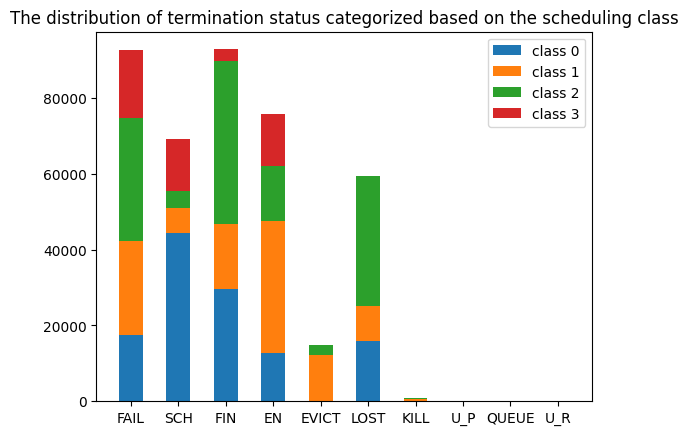

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# data from https://allisonhorst.github.io/palmerpenguins/

  

species = ['FAIL', 'SCH', 'FIN', 'EN', 'EVICT', 'LOST', 'KILL', 'U_P', 'QUEUE', 'U_R']
weight_counts = {
    "class 0": np.array(l0),
    "class 1": np.array(l1),
    "class 2":np.array(l2),
    "class 3":np.array(l3),
}
width = 0.5
fig, ax = plt.subplots()
bottom = np.zeros(10)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("The distribution of termination status categorized based on the scheduling class")
ax.legend(loc="upper right")
plt.show()

<Axes: >

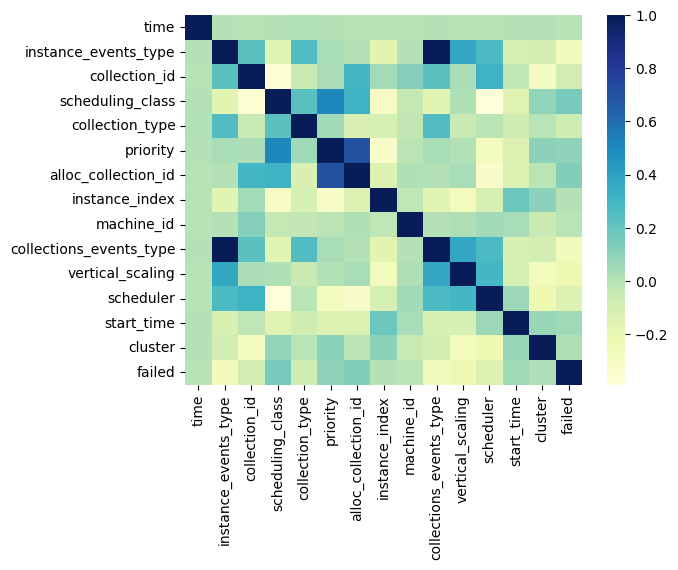

In [ ]:
sns.heatmap(data.corr(), cmap = 'YlGnBu')

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 14.1 MB/s eta 0:00:00


In [ ]:
#data_f= pd.read_csv('/content/gdrive/MyDrive/research/crash prediction/dataset/borg_traces_data.csv')


#for i in drop_list:
  #data_f.drop([i],axis=1,inplace=True)

# fetature importance measurement (part2)
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
def feature_eval(X_train, X_test, y_train, y_test):
  clf = CatBoostClassifier()
  clf.fit(X_train,y_train)
  y_pred_cat=clf.predict(X_test)
  score = accuracy_score(y_test, y_pred_cat)
  return score

In [ ]:
categorical_col = []

for i in data_f.columns:
  if type(data_f[i][0]) == np.str:
    categorical_col.append(i)

<ipython-input-54-ca266b314ab4>:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(data_f[i][0]) == np.str:


In [ ]:
f = [i for i in data.columns]
for i in f:
  print(i)

time
instance_events_type
collection_id
scheduling_class
collection_type
priority
alloc_collection_id
instance_index
machine_id
resource_request
constraint
collections_events_type
user
collection_name
collection_logical_name
start_after_collection_ids
vertical_scaling
scheduler
start_time
cluster
event
failed


In [ ]:
categorical_col = []

for i in data.columns:
  if type(data[i][0]) == np.str:
    categorical_col.append(i)
    

<ipython-input-74-1f18b9bbfad4>:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(data[i][0]) == np.str:


In [ ]:
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
labelling = LabelEncoder()
for i in categorical_col:
  data[i] = labelling.fit_transform(data[i])

In [ ]:
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
labelling = LabelEncoder()
for i in categorical_col:
  data_f[i] = labelling.fit_transform(data_f[i])

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

data_f = pd.DataFrame(imputer.fit_transform(data_f), columns=data_f.columns)

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [ ]:
# fetature importance measurement (part3)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression




col_list = list(data_f.columns.values)
importance ={}


for i in col_list:
  if i != 'failed':

    X = data[i]
    X = np.array(X)
    X = X.reshape(-1, 1)
    y = data['failed']
    y = np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=50)
    val = feature_eval(X_train, X_test, y_train, y_test)
    importance[i] = abs(val*100)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.5581001	total: 160ms	remaining: 31.9s
5:	learn: 0.5479438	total: 201ms	remaining: 33.3s
6:	learn: 0.5391036	total: 233ms	remaining: 33s
7:	learn: 0.5325794	total: 267ms	remaining: 33.1s
8:	learn: 0.5279482	total: 303ms	remaining: 33.4s
9:	learn: 0.5239576	total: 336ms	remaining: 33.2s
10:	learn: 0.5210248	total: 365ms	remaining: 32.8s
11:	learn: 0.5186919	total: 397ms	remaining: 32.7s
12:	learn: 0.5167604	total: 436ms	remaining: 33.1s
13:	learn: 0.5154073	total: 469ms	remaining: 33s
14:	learn: 0.5145723	total: 498ms	remaining: 32.7s
15:	learn: 0.5137964	total: 526ms	remaining: 32.4s
16:	learn: 0.5130242	total: 556ms	remaining: 32.2s
17:	learn: 0.5125531	total: 584ms	remaining: 31.8s
18:	learn: 0.5122342	total: 612ms	remaining: 31.6s
19:	learn: 0.5118608	total: 649ms	remaining: 31.8s
20:	learn: 0.5115330	total: 690ms	remaining: 32.2s
21:	learn: 0.5114536	total: 722ms	remaining: 32.1s
22:	learn: 0.5112357	total: 753ms	remaini

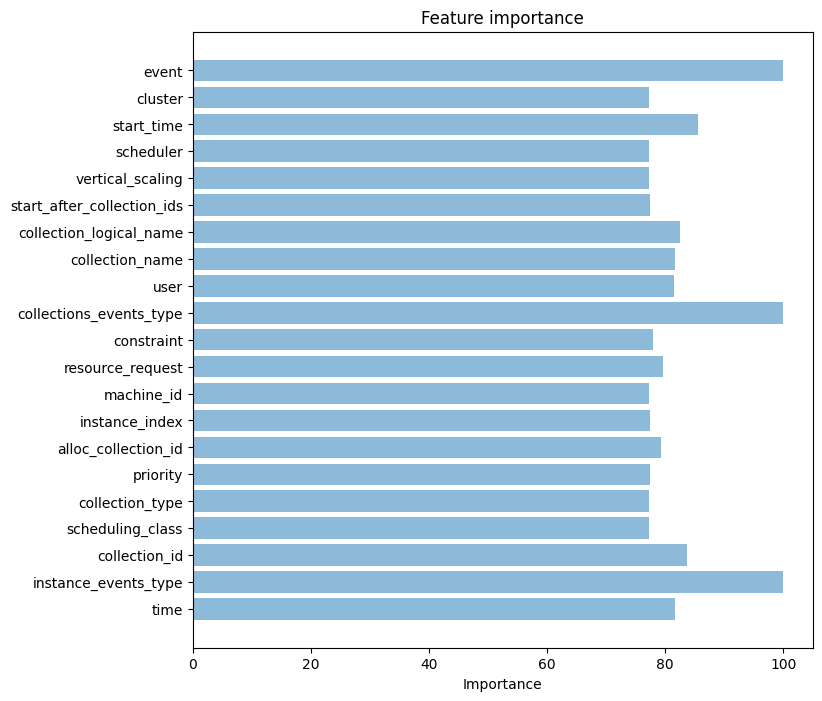

In [ ]:
# fetature importance measurement (part4)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt



objects = importance.keys()
y_pos = np.arange(len(objects))
performance = importance.values()
plt.figure(figsize=(8,8))
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Importance')
plt.title('Feature importance')

plt.show()


In [ ]:
for k,v in importance.items():
  print(f'{k} : {v} %')

time : 81.57659174338296 %
instance_events_type : 100.0 %
collection_id : 83.74955859044584 %
scheduling_class : 77.19698773907973 %
collection_type : 77.19698773907973 %
priority : 77.38422751274955 %
alloc_collection_id : 79.32396586980266 %
instance_index : 77.439249726942 %
machine_id : 77.19698773907973 %
resource_request : 79.6861270109798 %
constraint : 77.90817038819404 %
collections_events_type : 100.0 %
user : 81.4361619131306 %
collection_name : 81.71702157363534 %
collection_logical_name : 82.51853920127455 %
start_after_collection_ids : 77.419540277082 %
vertical_scaling : 77.19698773907973 %
scheduler : 77.19698773907973 %
start_time : 85.49877226551914 %
cluster : 77.19698773907973 %
event : 100.0 %


In [ ]:
print(data.isnull().sum())

time                            0
instance_events_type            0
collection_id                   0
scheduling_class                0
collection_type                 0
priority                        0
alloc_collection_id             0
instance_index                  0
machine_id                      0
resource_request              774
constraint                      0
collections_events_type         0
user                            0
collection_name                 0
collection_logical_name         0
start_after_collection_ids      0
vertical_scaling              959
scheduler                     959
start_time                      0
event                           0
failed                          0
dtype: int64


In [ ]:
f = [i for i in data.columns]
print(f)

['time', 'instance_events_type', 'collection_id', 'scheduling_class', 'collection_type', 'priority', 'alloc_collection_id', 'instance_index', 'machine_id', 'resource_request', 'constraint', 'collections_events_type', 'user', 'collection_name', 'collection_logical_name', 'start_after_collection_ids', 'vertical_scaling', 'scheduler', 'start_time', 'event', 'failed']


In [ ]:
categorical_col = []

for i in data.columns:
  if type(data[i][0]) == np.str:
    categorical_col.append(i)
    

<ipython-input-43-1f18b9bbfad4>:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(data[i][0]) == np.str:


In [ ]:
print(categorical_col)

['resource_request', 'constraint', 'user', 'collection_name', 'collection_logical_name', 'start_after_collection_ids', 'event']


In [ ]:
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
labelling = LabelEncoder()
for i in categorical_col:
  data[i] = labelling.fit_transform(data[i])

In [ ]:

count = 0
for i in data.columns:
  if type(data[i][0]) == np.str:
    count+=1
print(count)

0


<ipython-input-46-1cfb3fc2438f>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(data[i][0]) == np.str:


In [ ]:
X = data.drop('failed',axis=1)
y = data['failed']

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=100)

#Applied ML, DL algorithm


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 14.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split





cat = CatBoostClassifier()
cat.fit(X_train, y_train, verbose=100)
y_pred_cat = cat.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_cat)
cat_score = accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Learning rate set to 0.107646
0:	learn: 0.3119783	total: 50.2ms	remaining: 50.1s
100:	learn: 0.0000740	total: 4.75s	remaining: 42.3s
200:	learn: 0.0000739	total: 11.7s	remaining: 46.3s
300:	learn: 0.0000739	total: 16.2s	remaining: 37.7s
400:	learn: 0.0000739	total: 21s	remaining: 31.4s
500:	learn: 0.0000739	total: 27.5s	remaining: 27.4s
600:	learn: 0.0000739	total: 32.1s	remaining: 21.3s
700:	learn: 0.0000739	total: 38.8s	remaining: 16.6s
800:	learn: 0.0000739	total: 43.4s	remaining: 10.8s
900:	learn: 0.0000739	total: 50.6s	remaining: 5.56s
999:	learn: 0.0000739	total: 56s	remaining: 0us
Accuracy: 100.00%


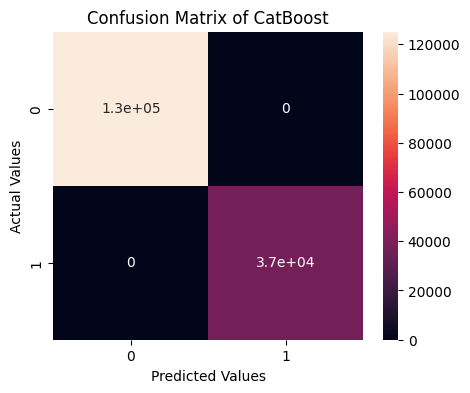

In [ ]:
cls = ['0','1']
cm_model = confusion_matrix(y_test, y_pred_cat)
d_model = calculations(cm_model,cls)

cm_df = pd.DataFrame(cm_model,
                     index = cls, 
                     columns = cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of CatBoost')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['0','1']
print('Classification Report of CatBoost:')
print(classification_report(y_test, y_pred_cat, target_names=target_names))





Classification Report of CatBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    125110
           1       1.00      1.00      1.00     37248

    accuracy                           1.00    162358
   macro avg       1.00      1.00      1.00    162358
weighted avg       1.00      1.00      1.00    162358



In [ ]:
r_cat = result(cat_score,y_test, y_pred_cat)
print(r_cat)

{'accuracy': '100.00%', 'error': '0.00%', 'f1': '100.00%', 'precision': '100.00%', 'specificity': '100.00%'}


In [ ]:
#LGB BOOST

import lightgbm as lgb
from sklearn.metrics import accuracy_score
import re
X_1 = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

lgb = lgb.LGBMClassifier()
lgb = lgb.fit(X_1, y_train)
y_pred_lgb = lgb.predict(X_test)
score_lgb = accuracy_score(y_test, y_pred_lgb)
print(score_lgb)

1.0


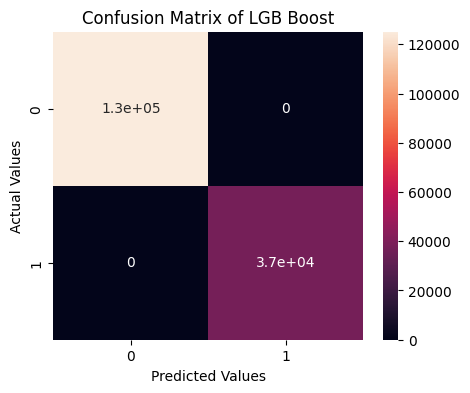

In [ ]:
cls = ['0','1']
cm_model = confusion_matrix(y_test, y_pred_lgb)
d_model = calculations(cm_model,cls)

cm_df = pd.DataFrame(cm_model,
                     index = cls, 
                     columns = cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of LGB Boost')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['0','1']
print('Classification Report of LGB Boost:')
print(classification_report(y_test, y_pred_lgb, target_names=target_names))





Classification Report of LGB Boost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    125110
           1       1.00      1.00      1.00     37248

    accuracy                           1.00    162358
   macro avg       1.00      1.00      1.00    162358
weighted avg       1.00      1.00      1.00    162358



In [ ]:
r_lgb = result(score_lgb,y_test, y_pred_lgb)
print(r_lgb)

{'accuracy': '100.00%', 'error': '0.00%', 'f1': '100.00%', 'precision': '100.00%', 'specificity': '100.00%'}


In [ ]:
print(X.isnull().sum())

time                          0
instance_events_type          0
collection_id                 0
scheduling_class              0
collection_type               0
priority                      0
alloc_collection_id           0
instance_index                0
machine_id                    0
resource_request              0
constraint                    0
collections_events_type       0
user                          0
collection_name               0
collection_logical_name       0
start_after_collection_ids    0
vertical_scaling              0
scheduler                     0
start_time                    0
event                         0
dtype: int64


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [ ]:
print(X.isnull().sum())

time                          0
instance_events_type          0
collection_id                 0
scheduling_class              0
collection_type               0
priority                      0
alloc_collection_id           0
instance_index                0
machine_id                    0
resource_request              0
constraint                    0
collections_events_type       0
user                          0
collection_name               0
collection_logical_name       0
start_after_collection_ids    0
vertical_scaling              0
scheduler                     0
start_time                    0
event                         0
dtype: int64


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=100)

In [ ]:
#gradient Boost

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

#n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0
gb= GradientBoostingClassifier()
gb= gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
score_gb = accuracy_score(y_test, y_pred_lgb)
print(score_gb)

1.0


In [ ]:
r_gb = result(score_gb,y_test, y_pred_gb)
print(r_gb)

{'accuracy': '100.00%', 'error': '0.00%', 'f1': '100.00%', 'precision': '100.00%', 'specificity': '100.00%'}


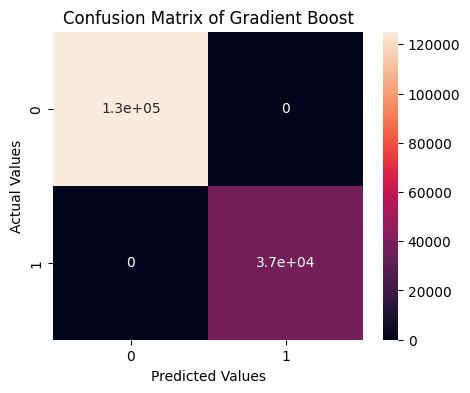

In [ ]:
cls = ['0','1']
cm_model = confusion_matrix(y_test, y_pred_gb)
d_model = calculations(cm_model,cls)

cm_df = pd.DataFrame(cm_model,
                     index = cls, 
                     columns = cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of Gradient Boost')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['0','1']
print('Classification Report of Gradient Boost:')
print(classification_report(y_test, y_pred_gb, target_names=target_names))





Classification Report of Gradient Boost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    125110
           1       1.00      1.00      1.00     37248

    accuracy                           1.00    162358
   macro avg       1.00      1.00      1.00    162358
weighted avg       1.00      1.00      1.00    162358



In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split




rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_score = rfr.score(X_test, y_test)
print(rfr_score)

y_pred_rf = rfr.predict(X_test)

1.0


In [ ]:
r_rf = result(rfr_score,y_test, y_pred_rf)
print(r_rf)

{'accuracy': '100.00%', 'error': '0.00%', 'f1': '100.00%', 'precision': '100.00%', 'specificity': '100.00%'}


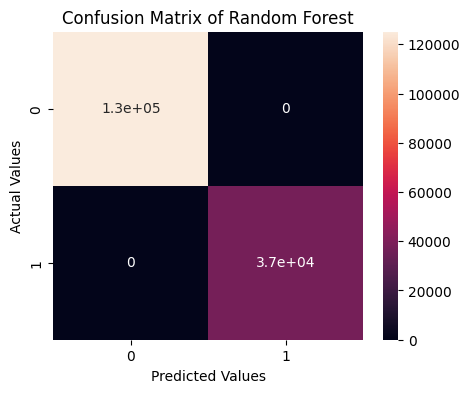

In [ ]:
cls = ['0','1']
cm_model = confusion_matrix(y_test, y_pred_rf)
d_model = calculations(cm_model,cls)

cm_df = pd.DataFrame(cm_model,
                     index = cls, 
                     columns = cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of Random Forest')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['0','1']
print('Classification Report of RandomForest:')
print(classification_report(y_test, y_pred_rf, target_names=target_names))





Classification Report of RandomForest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    125110
           1       1.00      1.00      1.00     37248

    accuracy                           1.00    162358
   macro avg       1.00      1.00      1.00    162358
weighted avg       1.00      1.00      1.00    162358



In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_score = knn.score(X_test, y_test)
print(knn_score)
y_pred_knn = knn.predict(X_test)

0.9654960026607866


In [ ]:
r_knn = result(knn_score,y_test, y_pred_knn)
print(r_knn)

{'accuracy': '96.55%', 'error': '3.45%', 'f1': '92.42%', 'precision': '93.19%', 'specificity': '98.00%'}


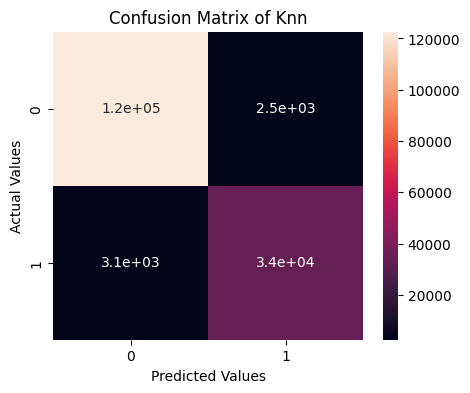

In [ ]:
cls = ['0','1']
cm_model = confusion_matrix(y_test, y_pred_knn)
d_model = calculations(cm_model,cls)

cm_df = pd.DataFrame(cm_model,
                     index = cls, 
                     columns = cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of Knn')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['0','1']
print('Classification Report of KNN:')
print(classification_report(y_test, y_pred_knn, target_names=target_names))



Classification Report of KNN:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    125110
           1       0.93      0.92      0.92     37248

    accuracy                           0.97    162358
   macro avg       0.95      0.95      0.95    162358
weighted avg       0.97      0.97      0.97    162358



In [ ]:
#Logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train,y_train)

lr_score = lr.score(X_test,y_test)

print(lr_score)


y_pred_lr = lr.predict(X_test)

0.7784402370071077


In [ ]:
r_lr = result(lr_score,y_test, y_pred_lr)
print(r_lr)

{'accuracy': '77.84%', 'error': '22.16%', 'f1': '30.47%', 'precision': '54.40%', 'specificity': '94.72%'}


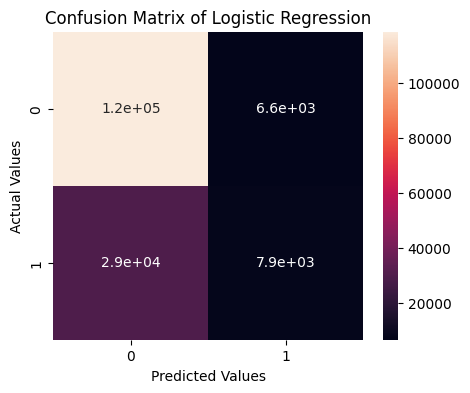

In [ ]:
cls = ['0','1']
cm_model = confusion_matrix(y_test, y_pred_lr)
d_model = calculations(cm_model,cls)

cm_df = pd.DataFrame(cm_model,
                     index = cls, 
                     columns = cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['0','1']
print('Classification Report of Logistic Regression:')
print(classification_report(y_test, y_pred_lr, target_names=target_names))



Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87    125110
           1       0.54      0.21      0.30     37248

    accuracy                           0.78    162358
   macro avg       0.67      0.58      0.59    162358
weighted avg       0.74      0.78      0.74    162358



In [ ]:
#Naive Biases

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_score = gnb.score(X_test,y_test)
print(gnb_score)

y_pred_gnb = gnb.predict(X_test)

0.22941893839539781


In [ ]:

r_nb = result(gnb_score,y_test, y_pred_gnb)
print(r_nb)

{'accuracy': '22.94%', 'error': '77.06%', 'f1': '37.32%', 'precision': '22.94%', 'specificity': '0.00%'}


<ipython-input-2-ff47e7663f52>:29: RuntimeWarning: invalid value encountered in long_scalars
  ppv = TP/(TP+FP)
<ipython-input-2-ff47e7663f52>:30: RuntimeWarning: invalid value encountered in long_scalars
  npv = TN/(TN+FN)


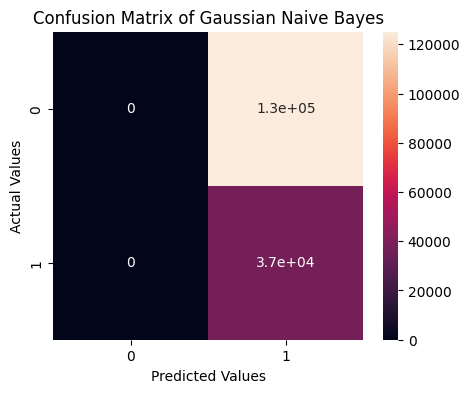

In [ ]:
cls = ['0','1']
cm_model = confusion_matrix(y_test, y_pred_gnb)
d_model = calculations(cm_model,cls)

cm_df = pd.DataFrame(cm_model,
                     index = cls, 
                     columns = cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of Gaussian Naive Bayes')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['0','1']
print('Classification Report of GNB:')
print(classification_report(y_test, y_pred_gnb, target_names=target_names))

Classification Report of GNB:


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    125110
           1       0.23      1.00      0.37     37248

    accuracy                           0.23    162358
   macro avg       0.11      0.50      0.19    162358
weighted avg       0.05      0.23      0.09    162358



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier()


clf = clf.fit(X_train,y_train)

y_pred_dt = clf.predict(X_test)

dt_score = clf.score(X_test,y_test)
print(dt_score)

1.0


In [ ]:

r_dt = result(dt_score,y_test, y_pred_dt)
print(r_dt)

{'accuracy': '100.00%', 'error': '0.00%', 'f1': '100.00%', 'precision': '100.00%', 'specificity': '100.00%'}


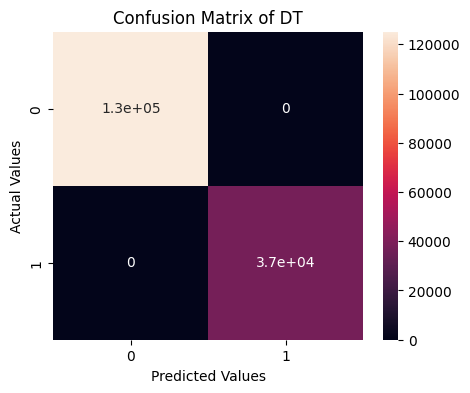

In [ ]:
cls = ['0','1']
cm_model = confusion_matrix(y_test, y_pred_dt)
d_model = calculations(cm_model,cls)

cm_df = pd.DataFrame(cm_model,
                     index = cls, 
                     columns = cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of DT')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['0','1']
print('Classification Report of DT:')
print(classification_report(y_test, y_pred_dt, target_names=target_names))

Classification Report of DT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    125110
           1       1.00      1.00      1.00     37248

    accuracy                           1.00    162358
   macro avg       1.00      1.00      1.00    162358
weighted avg       1.00      1.00      1.00    162358



In [ ]:
#linear classifier
from sklearn.linear_model import Perceptron
lc = Perceptron(random_state=0)   
lc = lc.fit(X_train, y_train)





y_pred_lc = lc.predict(X_test)

lc_score = lc.score(X_test,y_test)
print(lc_score)



0.8114105864817256


In [ ]:

r_lc = result(lc_score,y_test, y_pred_lc)
print(r_lc)

{'accuracy': '81.14%', 'error': '18.86%', 'f1': '49.73%', 'precision': '64.01%', 'specificity': '93.19%'}


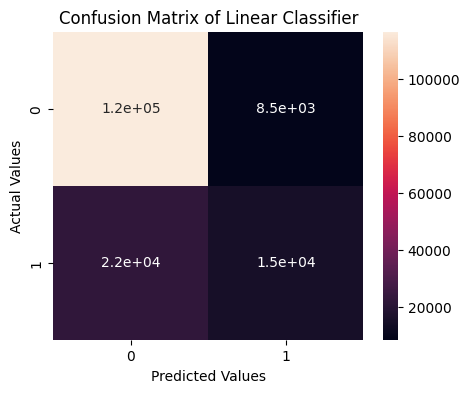

In [ ]:
cls = ['0','1']
cm_model = confusion_matrix(y_test, y_pred_lc)
d_model = calculations(cm_model,cls)

cm_df = pd.DataFrame(cm_model,
                     index = cls, 
                     columns = cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of Linear Classifier')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['0','1']
print('Classification Report of Linear Classifier:')
print(classification_report(y_test, y_pred_lc, target_names=target_names))

Classification Report of Linear Classifier:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88    125110
           1       0.64      0.41      0.50     37248

    accuracy                           0.81    162358
   macro avg       0.74      0.67      0.69    162358
weighted avg       0.79      0.81      0.80    162358



In [ ]:
c = 0

for i in X.columns:
  c+=1

print(c)

20


In [ ]:
# MLP

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense


# Define the model
model = Sequential()
model.add( Input(shape = (20,)) )
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32,verbose=1)



Epoch 1/100
7611/7611 [==============================] - 31s 4ms/step - loss: 98573520.0000 - accuracy: 0.7173
Epoch 2/100
7611/7611 [==============================] - 26s 3ms/step - loss: 6409.5938 - accuracy: 0.7723
Epoch 3/100
7611/7611 [==============================] - 28s 4ms/step - loss: 2792.8350 - accuracy: 0.7724
Epoch 4/100
7611/7611 [==============================] - 26s 3ms/step - loss: 17275.1348 - accuracy: 0.7724
Epoch 5/100
7611/7611 [==============================] - 26s 3ms/step - loss: 0.5365 - accuracy: 0.7724
Epoch 6/100
7611/7611 [==============================] - 26s 3ms/step - loss: 0.5365 - accuracy: 0.7724
Epoch 7/100
7611/7611 [==============================] - 26s 3ms/step - loss: 0.5365 - accuracy: 0.7724
Epoch 8/100
7611/7611 [==============================] - 25s 3ms/step - loss: 0.5365 - accuracy: 0.7724
Epoch 9/100
7611/7611 [==============================] - 25s 3ms/step - loss: 0.5365 - accuracy: 0.7724
Epoch 10/100
7611/7611 [=======================

In [ ]:

y_pred_mlp = model.predict(X_test)
y_pred_mlp = y_pred_mlp.astype(int)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy: ", accuracy_mlp)

5074/5074 [==============================] - 10s 2ms/step
Accuracy:  0.7705810616046022


In [ ]:

r_mlp = result(accuracy_mlp,y_test, y_pred_mlp)
print(r_mlp)

{'accuracy': '77.06%', 'error': '22.94%', 'f1': '0.00%', 'precision': '0.00%', 'specificity': '100.00%'}


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-2-ff47e7663f52>:30: RuntimeWarning: invalid value encountered in long_scalars
  npv = TN/(TN+FN)
<ipython-input-2-ff47e7663f52>:29: RuntimeWarning: invalid value encountered in long_scalars
  ppv = TP/(TP+FP)


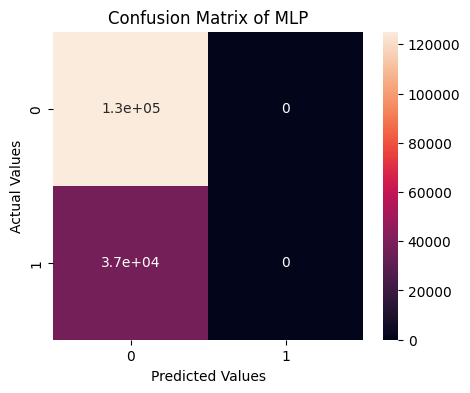

In [ ]:
cls = ['0','1']
cm_model = confusion_matrix(y_test, y_pred_mlp)
d_model = calculations(cm_model,cls)

cm_df = pd.DataFrame(cm_model,
                     index = cls, 
                     columns = cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix of MLP')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ['0','1']
print('Classification Report of MLP:')
print(classification_report(y_test, y_pred_mlp, target_names=target_names))

Classification Report of MLP:


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.77      1.00      0.87    125110
           1       0.00      0.00      0.00     37248

    accuracy                           0.77    162358
   macro avg       0.39      0.50      0.44    162358
weighted avg       0.59      0.77      0.67    162358



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from prettytable import PrettyTable
#{'accuracy': '80.66%', 'error': '19.34%', 'f1': '49.07%', 'precision': '61.16%', 'specificity': '92.34%'}
# These 3 are the columns of the tables
t = PrettyTable(['Model', 'Accuracy', 'Error Rate', 'F1 score', 'Precision', 'Specificity'])
 
# To insert rows:
t.add_row(['Cat Boost'] + list(r_cat.values()))
t.add_row(['LGB Boost'] + list(r_lgb.values()))
t.add_row(['Gradient Boost'] + list(r_gb.values()))
t.add_row(['Random Forest'] + list(r_rf.values()))
t.add_row(['KNN'] + list(r_knn.values()))
t.add_row(['Logistic Regression'] + list(r_lr.values()))
t.add_row(['Naive Biases'] + list(r_nb.values()))
t.add_row(['Decision Tree'] + list(r_dt.values()))
t.add_row(['Linear Classifier'] + list(r_lc.values()))
t.add_row(['MLP'] + list(r_mlp.values()))

print(t)

+---------------------+----------+------------+----------+-----------+-------------+
|        Model        | Accuracy | Error Rate | F1 score | Precision | Specificity |
+---------------------+----------+------------+----------+-----------+-------------+
|      Cat Boost      | 100.00%  |   0.00%    | 100.00%  |  100.00%  |   100.00%   |
|      LGB Boost      | 100.00%  |   0.00%    | 100.00%  |  100.00%  |   100.00%   |
|    Gradient Boost   | 100.00%  |   0.00%    | 100.00%  |  100.00%  |   100.00%   |
|    Random Forest    | 100.00%  |   0.00%    | 100.00%  |  100.00%  |   100.00%   |
|         KNN         |  96.55%  |   3.45%    |  92.42%  |   93.19%  |    98.00%   |
| Logistic Regression |  77.84%  |   22.16%   |  30.47%  |   54.40%  |    94.72%   |
|     Naive Biases    |  22.94%  |   77.06%   |  37.32%  |   22.94%  |    0.00%    |
|    Decision Tree    | 100.00%  |   0.00%    | 100.00%  |  100.00%  |   100.00%   |
|  Linear Classifier  |  81.14%  |   18.86%   |  49.73%  |   64.0

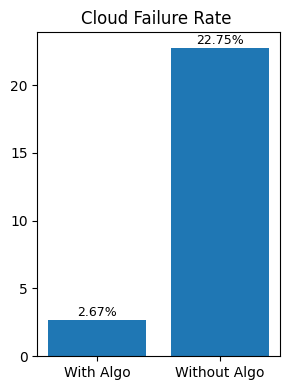

In [1]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [3, 4]
plt.rcParams["figure.autolayout"] = True

frequencies = [2.67,22.75]

plt.figure()

p1 = plt.bar(np.arange(len(frequencies)), frequencies)

objects = ('With Algo', 'Without Algo')
y_pos = np.arange(len(objects))
plt.xticks(y_pos, objects)
plt.title('Cloud Failure Rate ')
for rect1 in p1:
    height = rect1.get_height()
    plt.annotate( "{}%".format(height),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=9)

plt.show()